## Chi Square Distribution 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sample1=np.random.normal(loc=0,scale=1,size=100)
sample2=np.random.normal(loc=0,scale=1,size=100)
sample3=np.random.normal(loc=0,scale=1,size=100)
sample4=np.random.normal(loc=0,scale=1,size=100)
sample5=np.random.normal(loc=0,scale=1,size=100)

In [9]:
sample1

array([ 1.87685338e-02,  1.65296483e+00, -1.74146706e+00,  3.11753224e-01,
       -3.49162339e-01,  6.14934317e-02,  1.59172829e-01,  8.82192169e-01,
       -1.06973204e+00,  1.20703514e-01, -4.80086335e-01, -3.48417902e-01,
        6.01296952e-01,  2.15290630e+00, -1.40479501e+00, -1.38334324e-01,
        2.71308723e-01,  1.96362316e-02,  2.04828619e-02, -7.62428272e-01,
       -6.93022997e-01,  1.05015550e+00, -1.52982620e+00, -9.40162882e-01,
       -9.49574161e-01, -1.77581565e+00, -2.75609544e+00,  1.98157430e+00,
        4.32435643e-01,  2.25872586e-01, -4.97312555e-01,  1.51205268e-01,
       -9.68852981e-02, -1.28866263e-01, -1.80835124e+00, -1.06603306e+00,
       -1.22773525e+00, -1.79068274e-01,  8.78121965e-01,  7.67349883e-01,
        2.72210885e-01,  2.30310754e-01,  1.36225912e+00,  2.52516600e-01,
       -3.96703277e-01,  1.30506385e+00,  3.17598334e-01, -3.11567479e-01,
       -1.15850379e+00, -4.07286114e-01,  1.58604038e+00, -1.42056336e+00,
        8.06744008e-01, -

<Axes: ylabel='Density'>

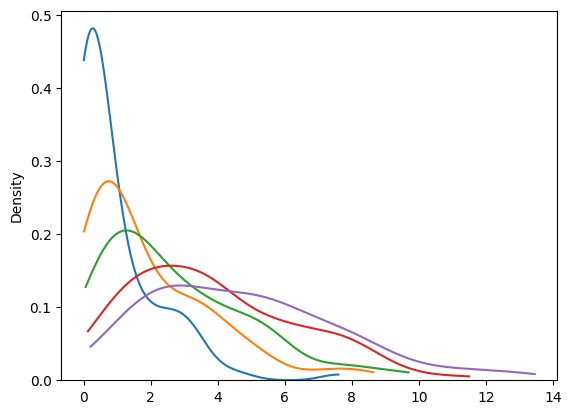

In [10]:
x=sample1**2 
y=sample1**2+sample2**2
z=sample1**2+sample2**2+sample3**2
u=sample1**2+sample2**2+sample3**2+sample4**2
v=sample1**2+sample2**2+sample3**2+sample4**2+sample5**2

sns.kdeplot(x, clip=(x.min(),x.max()))
sns.kdeplot(y, clip=(y.min(),y.max()))
sns.kdeplot(z, clip=(z.min(),z.max()))
sns.kdeplot(u, clip=(u.min(),u.max()))
sns.kdeplot(v, clip=(v.min(),v.max()))

In [13]:
import scipy.stats as state

test_stat=9.99 ## chi square test statistic 
df=5 ## degree of fredom

p_val=state.chi2.sf(test_stat,df)
print("p- Value = ",p_val)

p- Value =  0.07551908806259365


### Goodness of Fit Test

In [ ]:
from scipy.stats import chisquare

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)  ## sample data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.shape

(891, 12)

In [ ]:
## h0 -> Pclass unifrom dristribution
## h1 -> pclass nonUnifrom dist..

In [ ]:
class_count=data["Pclass"].value_counts().sort_index()
class_count   ## obsevation table 

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [18]:
# Calculate the expected counts assuming a uniform distribution
total_people=len(data)
expected_count=total_people/3
expected_frequency=[expected_count]*3    ### expected_frequency

print(expected_frequency)

[297.0, 297.0, 297.0]


In [21]:
# Perform the Chi-Square Goodness of Fit test
chi2,p_val=chisquare(class_count,expected_frequency)

print("chi square Statistic :{:2f}".format(chi2))
print("P-val :{:4f}".format(p_val))

chi square Statistic :191.804714
P-val :0.000000


In [22]:
alpha = 0.05
if p_val < alpha:
    print("\nWe reject the null hypothesis. The distribution of passengers among the classes is not uniform.")
else:
    print("\nWe fail to reject the null hypothesis. The distribution of passengers among the classes is uniform.")



We reject the null hypothesis. The distribution of passengers among the classes is not uniform.


### Test for Independent

In [29]:
# We will use the Chi-Square test for independence to see if the survival rate of passengers is independent of the passenger class.
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
## h0 -> suirvived and pclass cols are independent from each other
## h1 -> associated each other

## observation table 
contingency_table=pd.crosstab(
    data["Survived"],
    data["Pclass"]
)
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [33]:
# Perform the Chi-Square test
chi2,p_val,dof,expected_frq=chi2_contingency(contingency_table)
alpha=0.05

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_val))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies: \n{}".format(expected_frq))  ### conttingency table of expected frequency


Chi-Square Statistic: 102.89
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies: 
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [34]:
# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between passenger class and survival rate.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between passenger class and survival rate.")


We reject the null hypothesis. There is a significant association between passenger class and survival rate.
